DIGIT PREDICTION USING KERAS

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_test.shape)

y_train

(10000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

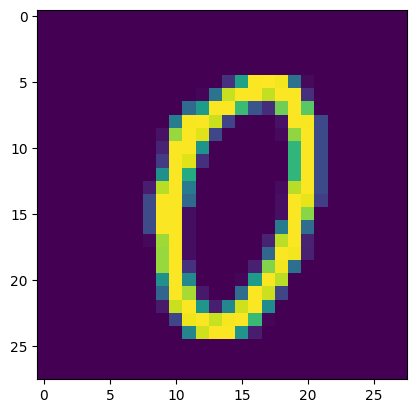

In [7]:
plt.imshow(X_train[1000])

In [8]:
X_train = X_train/255
X_test = X_test/255
#to conver the values from 0-255 to 0-1

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #no need of input layer it transform 28x28 data into flattened data of 784
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9756 - val_loss: 0.1056
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9982 - loss: 0.0072 - val_accuracy: 0.9711 - val_loss: 0.1316
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9761 - val_loss: 0.1067
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9760 - val_loss: 0.1121
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9749 - val_loss: 0.1209
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9756 - val_loss: 0.1179
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9762 - val_loss: 0.1158
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9985 - loss: 0.0047 - 

In [18]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9781

IMPROVING THE ACCURACY

In [19]:
model1 = Sequential()

In [20]:
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10,activation='softmax'))

c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model1.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9579 - loss: 0.1407 - val_accuracy: 0.9674 - val_loss: 0.1092
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9738 - loss: 0.0873 - val_accuracy: 0.9716 - val_loss: 0.0980
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9804 - loss: 0.0650 - val_accuracy: 0.9735 - val_loss: 0.0886
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9848 - loss: 0.0471 - val_accuracy: 0.9740 - val_loss: 0.0927
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9876 - loss: 0.0378 - val_accuracy: 0.9752 - val_loss: 0.0906
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9743 - val_loss: 0.0943
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.9746 - val_loss: 0.0973
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9940 - loss: 0.0188 - 

In [26]:
y_prob1 = model1.predict(X_test)
y_pred1 = y_prob1.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
accuracy_score(y_test,y_pred1)

0.9793

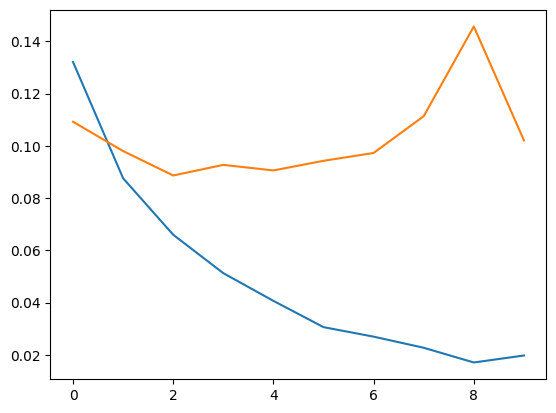

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

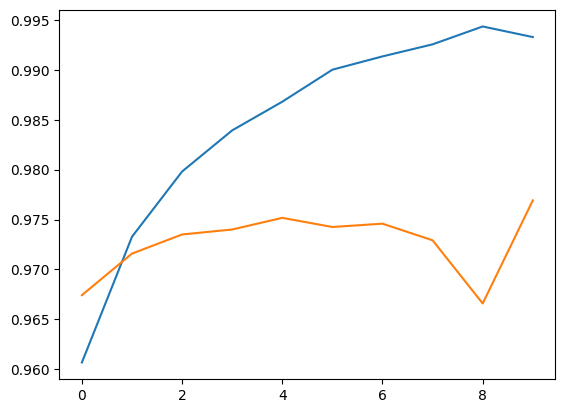

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])



predict some number

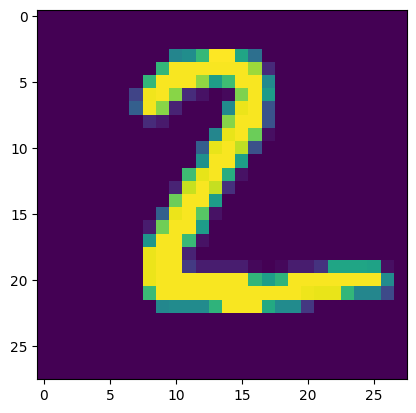

In [32]:
number =X_test[1]
plt.imshow(number)

In [33]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([2], dtype=int64)